Asymptotics
===========

Asymptotic theory is concerned about the behavior of statistics when the
sample size is arbitrarily large. It is a useful approximation technique
to simplify complicated finite-sample analysis.


**Simulation Example**

We demonstrate the law of large numbers (LLN) along with the underlying assumptions.

Write a function to generate the sample mean given the sample size $n$ and the distribution.
We allow three distributions, namely, $N(0,1)$, $t(2)$ and Cauchy.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sample_mean( n, distribution ):
  if distribution == "normal":
    y = np.random.normal( size = (n,1) ) 
  elif distribution == "t2":
    y = np.random.standard_t( 2, size = (n, 1) )
  elif distribution == "cauchy":
    y = np.random.standard_cauchy( size = (n, 1) )
                         
  return np.mean(y) 

In [3]:
# This function plots the sample mean over the path of geometrically increasing sample size.

def LLN_plot(distribution):
  y_bar = np.zeros( NN.size )
  
  for  i in range( NN.size ):
    n = NN[i]
    y_bar[i] = sample_mean(n, distribution)
    
  plt.plot(range(1,y_bar.size+1), y_bar)
  plt.axhline(0, color = 'black', linestyle = 'dashed')
  plt.title(distribution); plt.xlabel("sample size"); plt.ylabel("mean")
  

  return y_bar

The sample size is chosen as $2^x$, where $x=1:20$. Notice that $2^{20}=1.05\times  10^6$ is quite a large sample for economic datasets.  We have the following observations.

* When the distribution is $N(0,1)$, the Chebyshev LLN works. The sample mean converges fast.
* When the distribution is $t(2)$, which has zero mean but infinite variance, the Kolmogorov LLN works. The sample mean still converges, though more slowly than the $N(0,1)$ case.
* The Cauchy distribution has no moment at any order. The sample mean does not converge no matter how large is the sample size.

[-5.52862893e-01  5.88484937e-01 -4.66436137e-02 -2.26232829e-02
 -1.56379530e-01  4.28533257e-02 -2.61882044e-02  8.68486297e-02
  1.18036383e-02 -3.82296963e-02 -6.56421614e-03 -4.89218345e-03
  6.52178048e-03  1.54438936e-02  2.35215379e-03 -8.47480793e-05
  1.00512908e-03 -2.19289198e-04  6.91355230e-04 -5.88408859e-04]


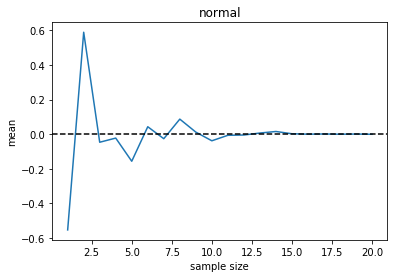

In [4]:
NN = 2 ** np.arange(1, 21)

l1 = LLN_plot("normal");print(l1)

[-1.62981772e-01  8.09395307e-01 -4.18282311e-01 -8.17919539e-01
  6.53773291e-01 -2.56510564e-01  4.42076063e-01 -7.55571616e-02
  3.55488196e-01 -6.79493089e-02 -1.06032243e-01  5.23658701e-02
  4.40097392e-02 -1.30694753e-02 -1.35286058e-02 -2.62525572e-02
 -8.79943144e-03 -1.00571549e-02 -4.05048763e-03  4.65775136e-04]


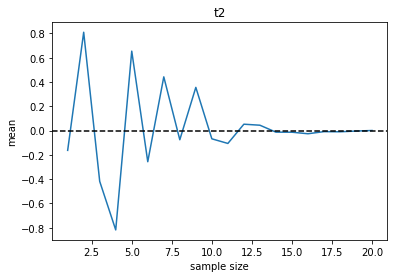

In [5]:
l2 = LLN_plot("t2"); print(l2)

[-0.35581528 -3.13971996 -4.17585417 -2.71641647  1.90251361 -0.07326771
 -0.93160383 -0.07013725  1.66607245  0.6767924   1.88146887  2.63163027
  0.45179696  1.01574963 -1.03421815  0.05515616 -0.07484184 -3.09230743
  0.5165665  -0.2180973 ]


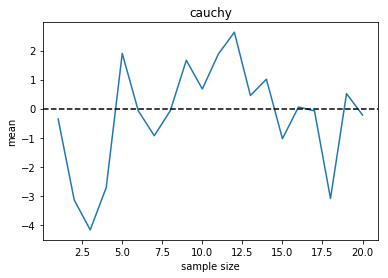

In [6]:
l3 = LLN_plot("cauchy"); print(l3)

Central Limit Theorem
---------------------

The central limit theorem (CLT) is a collection of probability results
about the convergence in distribution to a stable law, usually the normal distribution. 
The basic form of the CLT is: for a sample
$\left(z_{1},\ldots,z_{n}\right)$ of *zero-mean* random variables,
$$\frac{1}{\sqrt{n}}\sum_{i=1}^{n}z_{i}\stackrel{d}{\to}N\left(0,\sigma^{2}\right).\label{eq:clt}$$
Various versions of CLT work under different assumptions about the
random variables.

*Lindeberg-Levy CLT* is the simplest CLT.

-   If the sample is i.i.d., $E\left[x_{1}\right]=0$ and
    $\mathrm{var}\left[x_{1}^{2}\right]=\sigma^{2}<\infty$,
    then CLT holds.

Lindeberg-Levy CLT is easy to verify by the characteristic function. For
any random variable $x$, the function
$\varphi_{x}\left(t\right)=E\left[\exp\left(ixt\right)\right]$ is called
its *characteristic function*. The characteristic function fully
describes a distribution, just like PDF or CDF. For example, the
characteristic function of $N\left(\mu,\sigma^{2}\right)$ is
$\exp\left(it\mu-\frac{1}{2}\sigma^{2}t^{2}\right)$.

In [7]:
from scipy import stats

def Z_fun(n, distribution):

  if distribution == "normal":
      x = np.random.normal(size = n)
      z = np.sqrt(n) * np.mean(x)
  elif distribution == "chisq2":
      df = 2
      x = np.random.chisquare(df, size = n )
      z = np.sqrt(n) * ( np.mean(x) - df ) / np.sqrt(2*df)
      
  return z

def CLT_plot(n, distribution):
  Rep = 10000

  ZZ = np.zeros(Rep)

  for i in range(Rep):
    ZZ[i] = Z_fun(n, distribution)

  xbase = np.linspace(-4.0, 4.0, 100)
  plt.plot( xbase, stats.norm.pdf(xbase), color = "red" )
  plt.hist(ZZ, bins = int( Rep ** (1/2) ), density = True )
  plt.show()

  return ZZ


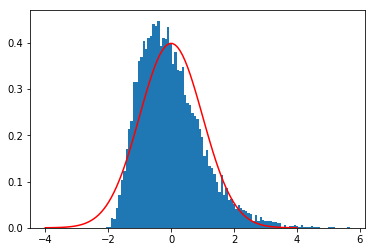

In [11]:
phist = CLT_plot(5, "chisq2")

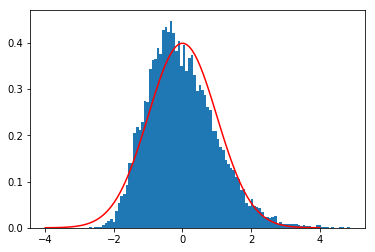

In [12]:
phist = CLT_plot(10, "chisq2")

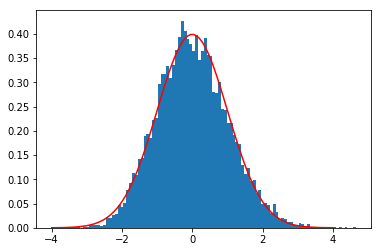

In [13]:
phist = CLT_plot(100, "chisq2")